<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Reproducible Papers - Syngine Paper</div>
        </div>
    </div>
</div>

---

# Figure 5: Seismogram Comparision

This notebook is part of the supplementary materials for the Syngine paper and reproduces figure 5.

This notebook creates a plot for seismograms for all models part of Syngine.
Requires matplotlib >= 1.5 and an ObsPy version (>= 1.0) with the Syngine client.

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))

In [1]:
%matplotlib inline
import obspy
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-whitegrid")

from obspy.clients.syngine import Client
c = Client()

In [2]:
models = c.get_available_models()
models

{'ak135f_1s': {'components': 'vertical only',
  'default_components': 'Z',
  'default_dt': '0.05',
  'description': 'ak135 with density & Q of Montagner & Kennet(1996), vertical only',
  'length': 1849.936,
  'max_event_depth': 750000,
  'max_period': '~100',
  'max_sampling_period': '0.253000',
  'min_period': 1.04999995231628},
 'ak135f_2s': {'components': 'vertical and horizontal',
  'default_components': 'ZNE',
  'default_dt': '0.1',
  'description': 'ak135 with density & Q of Montagner & Kennet(1996)',
  'length': 3599.925,
  'max_event_depth': 750000,
  'max_period': '~100',
  'max_sampling_period': '0.525000',
  'min_period': 2.09999990463257},
 'ak135f_5s': {'components': 'vertical and horizontal',
  'default_components': 'ZNE',
  'default_dt': '0.25',
  'description': 'ak135 with density & Q of Montagner & Kennet(1996)',
  'length': 3904.29,
  'max_event_depth': 750000,
  'max_period': '~100',
  'max_sampling_period': '1.278000',
  'min_period': 5.125},
 'iasp91_2s': {'compone

In [3]:
# Chile earthquake 2015-09-16 22:55:22 Mw 8.3
event_id = "GCMT:C201509162254A"

```
Date-Time (UTC): 	2015-09-16 22:55:22
Location: 	OFF COAST OF CENTRAL CHILE
Latitude, Longitude: 	-31.130 °, -72.090 °
Magnitude: 	8.3 MW
Depth: 	17.4 km
Author: 	Global CMT Project
Catalog, Contributor: 	GCMT, GCMT
```

In [4]:
network = "IU"
station = "ANMO"

from obspy.clients.fdsn import Client
c_fdsn = Client("IRIS")
print(c_fdsn.get_stations(network=network, station=station, format="text")[0][0])

Station ANMO (Albuquerque, New Mexico, USA)
	Station Code: ANMO
	Channel Count: None/None (Selected/Total)
	1989-08-29T00:00:00.000000Z - 1995-07-14T00:00:00.000000Z
	Access: None 
	Latitude: 34.95, Longitude: -106.46, Elevation: 1850.0 m
	Available Channels:



28 arrivals
	P phase arrival at 691.955 seconds
	pP phase arrival at 697.665 seconds
	sP phase arrival at 699.754 seconds
	PcP phase arrival at 707.881 seconds
	PP phase arrival at 855.963 seconds
	PKiKP phase arrival at 1048.759 seconds
	pPKiKP phase arrival at 1054.742 seconds
	sPKiKP phase arrival at 1056.774 seconds
	S phase arrival at 1261.209 seconds
	SKiKP phase arrival at 1261.481 seconds
	pS phase arrival at 1268.335 seconds
	sS phase arrival at 1270.622 seconds
	SP phase arrival at 1291.988 seconds
	PS phase arrival at 1294.389 seconds
	SKS phase arrival at 1297.744 seconds
	SKKS phase arrival at 1297.945 seconds
	ScS phase arrival at 1300.326 seconds
	pSKS phase arrival at 1305.392 seconds
	sSKS phase arrival at 1307.522 seconds
	SS phase arrival at 1544.095 seconds
	PKIKKIKP phase arrival at 1851.906 seconds
	PKKP phase arrival at 1866.736 seconds
	SKIKKIKP phase arrival at 2064.649 seconds
	PKIKKIKS phase arrival at 2066.681 seconds
	SKIKKIKS phase arrival at 2279.207 seco

/Users/lion/.miniconda3/envs/seismo_live/lib/python3.5/site-packages/obspy/taup/tau.py:577: UserWarning: Not able to evaluate positions of points on path. Arrivals object will not be modified. Install the Python module 'geographiclib' to solve this issue.
  warnings.warn(msg)


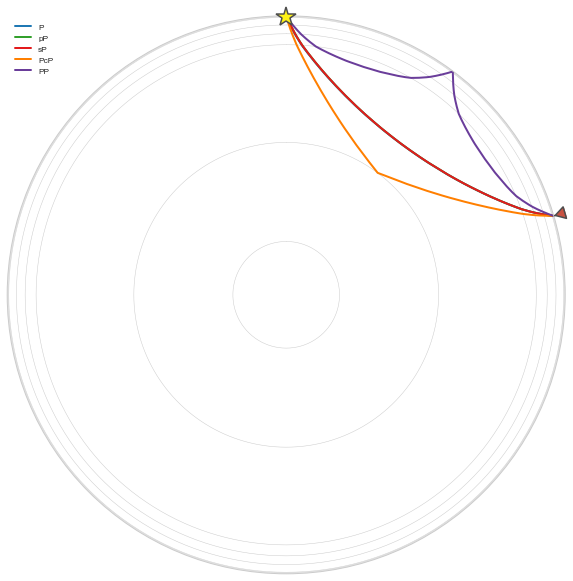

In [5]:
from obspy.taup import TauPyModel
m = TauPyModel("ak135")
print(m.get_travel_times_geo(source_depth_in_km=17.4, source_latitude_in_deg=-31.130,
                             source_longitude_in_deg=-72.090, receiver_latitude_in_deg=34.95,
                             receiver_longitude_in_deg=-106.46))
m.get_ray_paths_geo(source_depth_in_km=17.4, source_latitude_in_deg=-31.130,
                    source_longitude_in_deg=-72.090, receiver_latitude_in_deg=34.95,
                    receiver_longitude_in_deg=-106.46, phase_list=["P", "pP", "sP", "PcP", "PP"]).plot();

In [6]:
from obspy.geodetics import locations2degrees

locations2degrees(lat1=-31.130, long1=-72.090, lat2=34.95, long2=-106.46)

73.56279123796811

In [7]:
components = "Z"
# Varying length of databases. Use common time range.
starttime = obspy.UTCDateTime("2015-09-16T22:55:22.000000Z")
endtime = obspy.UTCDateTime("2015-09-16T23:23:46.200000Z")

data = {}
for model in models.keys():
    data[model] = c.get_waveforms(model=model, network=network, station=station,
                                  components=components, dt=0.05, eventid=event_id,
                                  starttime=starttime, endtime=endtime)

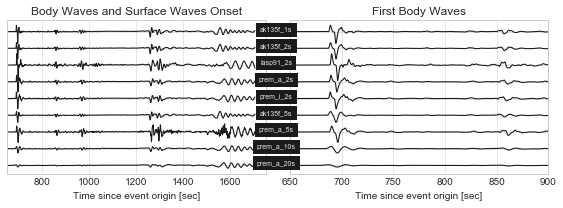

In [8]:
plt.figure(figsize=(8, 3))
factor = 1E2

for _i, model in enumerate(sorted(data.keys(),
                                  key=lambda x: (int(x.split("_")[-1][:-1]), x))):
    tr = data[model][0]
    pos = len(data) - _i - 1
    
    plt.subplot(121)
    plt.plot(tr.times(), tr.data * factor + pos, color="0.1", lw=1.1)

    plt.yticks(list(range(9)), [""] * 9)
    plt.ylim(-0.5, 8.7)
    plt.xlim(650, 1750)
    plt.xlabel("Time since event origin [sec]")
    plt.title("Body Waves and Surface Waves Onset")
    
    plt.subplot(122)
    plt.plot(tr.times(), tr.data * factor + pos, color="0.1", lw=1.1)
    plt.yticks(list(range(9)), [""] * 9)
    plt.ylim(-0.5, 8.7)
    plt.xlim(650, 900)
    plt.text(637, pos, model, color="0.9",
             bbox=dict(facecolor="0.1", edgecolor="None"),
             ha="center", fontsize=7)
    plt.xlabel("Time since event origin [sec]")
    plt.title("First Body Waves")
    

    
plt.tight_layout()
plt.savefig("compare_seismograms_for_all_models.pdf")
plt.show()